In [21]:
%matplotlib inline
from sklearn import datasets

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')

In [4]:
iris = datasets.load_iris()

In [5]:
type(iris)

sklearn.datasets.base.Bunch

In [6]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [7]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [10]:
X = iris.data
y = iris.target

In [11]:
df = pd.DataFrame(X, columns=iris.feature_names)

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA04402EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BA04A81F28>]], dtype=object)

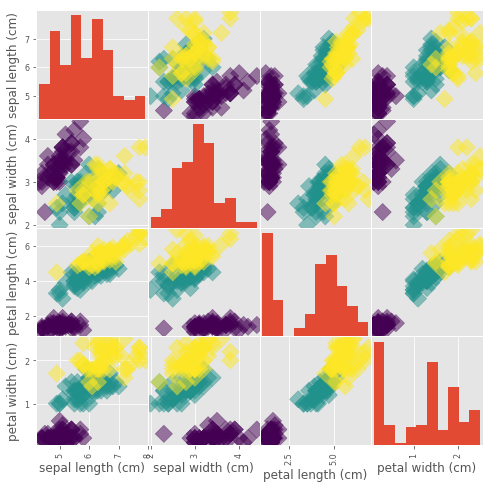

In [27]:
# Visual EDA
# c:color, ensures that our data is going to be differenciated by color
pd.scatter_matrix(df, c=y, figsize=[8, 8], s=150, marker='D')

In [28]:
knn = KNeighborsClassifier(n_neighbors=6)

In [29]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [34]:
prediction = knn.predict(np.array([5, 3, 2.5, 1]).reshape(1, -1))
print('Prediction: {}'.format(*prediction))

Prediction: 0


In [38]:
# Measuring performance
# random_state is the seed, by wich the data is goint to be splitted
# stratify=y makes the train and set sample similar to the total data, y is the list of arrays containing the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Test set predictions: {}'.format(y_pred))
print('Real values: {}'.format(y_test))

Test set predictions: [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]
Real values: [2 2 2 2 1 0 1 0 0 1 0 2 0 1 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [39]:
knn.score(X_test, y_test)

0.9555555555555556